# Polynominterpolasjon

# Innledning 

# Problemstilling
Gitt $n+1$ punkter $(x_i,y_i)_{i=0}^n$ med distinkte $x$-verdier (dvs. $x_i \not= x_j$ hvis $i\not=j$). Finn et polynom $p(x)$ av lavest mulig grad slik at

$$ p(x_i) = y_i,\qquad i=0,\dotsc, n. $$

Denne betingelsen betegnes heretter som _interpolasjonsbetingelsen_, og polynomet $p(x)$ som _interpolasjonspolynomet_. 

#### Spørsmål: 
1. Hva er "lavest mulig grad"?
1. Hvordan finner vi et slikt polynom?
1. Er det entydig? 
1. Hvis et interpolasjonspolynom brukes som en tilnærmelse til en funksjon $f$, hva kan vi da si om feilen $f(x)-p(x)$? 
1. Og hvordan kan denne feilen gjøres liten? 

Interpolasjonsbetingelsen utgjør tilsammen $n+1$ ligninger. Et polynom av grad $n$ er av dimensjon $n+1$, det betyr at det er rimelig å anta at vi søker polynomer av grad $n$. Setter vi inn det generelle utrykket for polynomet $p_n(x)$ blir interpolasjonsbetingelen et system av lineære ligninger

$$ \sum_{i=0}^n x_j^i a_i = y_i, \qquad i=0,\dotsc, n. \tag{2}$$

som kan løses med hensyn på koeffisientene $a_i$, $i=0,2,\dots,n$. 
Dette er en mulig, men ofte ikke spesielt hensiktsmessig måte å finne interpolasjonspolynomet på. I det følgende skal vi se på en langt mer elegant strategi. 

### Notasjon
Et polynom av grad $n$ er gitt ved 

$$ 
p_n (x) = a_n x^n + a_{n-1}x^{n-1} + \dots + a_1 x + a_0, \qquad a_i \in \mathbb{R} \; \text{ for } \;i=0,\dotsc,n.  \tag{1}
$$ 

$\mathbb{P}_n$ er mengden av alle polynomer av grad $n$ (eller mindre, siden $a_n$ kan være 0).   
Legg merke til at $\mathbb{P}_n$ er et vektorrom av dimensjon $n+1$, se f.eks. [2, sec. 4.1, ex. 4].

$C^r[a,b]$ er mengden av alle funksjoner for hvem de første $r$ deriverte er kontinuerlige på intervallet $[a,b]$. 

# Lagrange interpolasjon. 

Gitt dataverdiene $(x_i,y_i)_{i=0}^n$ med distinkte $x$-verdier. 
Vi starter med å definere _kardinalfunksjoner_: 
$$ 
  \ell_i(x) = \prod_{j=0,j\not=i}^n \frac{x-x_j}{x_i-x_j}
  = \frac{x-x_0}{x_i-x_0} \dotsm \frac{x-x_{i-1}}{x_i-x_{i-1}}\cdot \frac{x-x_{i+1}}{x_i-x_{i+1}} \dotsm \frac{x-x_n}{x_i-x_n} , \qquad i=0,\dotsc,n. $$
Disse har følgende egenskaper: 
* $\ell_i \in \mathbb{P}_n$. 
* $\ell_i(x_j) = \delta_{ij} = \begin{cases} 1, & \text{når } i=j \\ 0, & \text{når }i\not=j \end{cases}$. 
* De avhenger bare av $x$-verdiene.
* De er lineært uavhengige, og utgjør dermed en basis for $\mathbb{P}_{n}$. 

Interpolasjonspolynomet er da gitt ved
$$ p_n(x) = \sum_{i=0}^n y_i \ell_i(x) $$ 
siden 
$$ p_n(x_j) = \sum_{i=0}^n y_i \ell_i(x_j) = y_i, \qquad j=0,\dotsc,n.$$ 

#####  Eksempel  
Gitt punktene: 

$$ 
\begin{array}{c|ccc} x_i & 0 & 1 & 3 \\ \hline y_i & 3 & 8 & 6 
\end{array}.
$$

De korresponderende kardinalfunksjonene er gitt ved

\begin{align}
  l_0(x) & = \frac{(x-1)(x-3)}{(0-1)(0-3)} 
           = \frac{1}{3}x^2-\frac{4}{3}x+1 \\
  l_1(x) & = \frac{(x-0)(x-3)}{(1-0)(1-3)} 
           = -\frac12 x^2 + \frac32 x \\
  l_2(x) &= \frac{(x-0)(x-1)}{(3-0)(3-1)} = \frac16 x^2-\frac16 x
\end{align}

og interpolasjonspolynomet er gitt ved

$$ p_2(x) = 3 \ell_0(x) + 8 \ell_1(x) + 6 \ell_2(x) = -2x^2 + 7x + 3. $$ 

## Implementasjon

Siden kardinalfunksjonene bare avhenger av $x$-verdien av interpolasjonspunktene, har vi valgt å implementere algoritmen 
over som to funksjoner: 
* `kardinal(xdata, x)`: Beregner kardinalfunksjonene $\ell_i(x)$   
* `lagrange(ydata, l)`: Beregner interpolasjonspolynomet $p_n(x)$ basert på verdiene av kardinalfunksjonene.  

**NB!** _De to neste cellene med kode blir brukt senere i notatet, så kjør disse nå._ 

In [11]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [12]:
def kardinal(xdata, x):
    """
    kardinal(xdata, x): 
    Inn: xdata, array med x-verdiene av interpolasjonspunktene
         x, array eller skalar med beregningspunkter
    Ut:  En liste med kardinalfunksjonene beregnet for x. 
    """
    n = len(xdata)
    l = []
    for i in range(n):
        li = np.ones(len(x))
        for j in range(n):
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)
    return l  

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    Inn: ydata, array med y-verdiene av interpolasjonspunktene
         l, liste med kardinalfunksjoner, fra kardinal(xdata, x)
    Ut:  Et array med interpolasjonspolynomet beregnet i x. 
    """
    poly = 0
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]
    return poly

La oss bruke disse til å bergene og tegne interpolasjonspolynomet for dataene i eksempel 1:

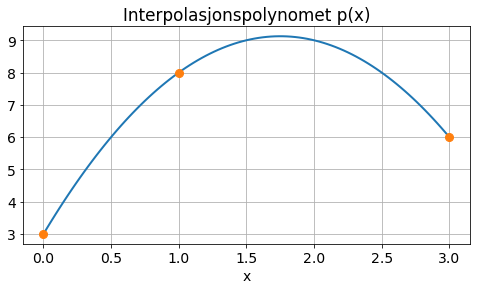

In [5]:
xdata = [0, 1, 3]
ydata = [3, 8, 6]
x = linspace(min(xdata), max(xdata), 101)     # Velg et passende intervall
l = kardinal(xdata, x)
p = lagrange(ydata, l)
plot(x, p)
plot(xdata, ydata, 'o')    # Plott interpolasjonspunktene 
title('Interpolasjonspolynomet p(x)')
xlabel('x');


Test: La oss se om vi får samme svar med koden som med beregningene gjort for hånd over:

In [6]:
mitt_res = -2*x**2+7*x+3         # Fra eksempel 1
print("Maks avvik er {:.2e}".format(np.max(abs(p-mitt_res))))

Maks avvik er 2.66e-15


Og det ser jo ut til å stemme bra. 

Til sist kan vi ta en titt på kardinalfunksjonene:

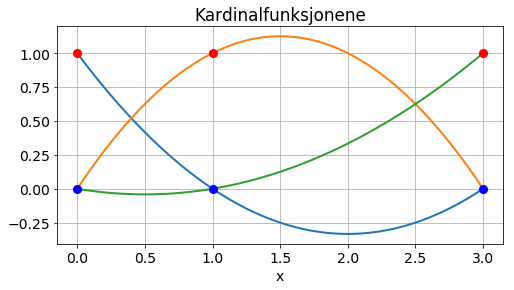

In [7]:
xdata = [0, 1, 3]
for li in l:
    plot(x, li)
plot(xdata, np.ones(len(xdata)), 'ro', xdata, np.zeros(len(xdata)), 'ob')
title('Kardinalfunksjonene')
xlabel('x');

# Teori

I denne seksjonen skal vi diskutere to temaer: 
* Eksistens og entydighet av interpolasjonspolynomer
* Hvor godt et interpolasjonspolynom kan tilnærme en gitt funksjon. 

## Eksistens og entydighet av interpolasjonspolynomer.
Vi har allerede vist at slike polynomer eksisterer. Men er de entydige? 

Anta at det fins to forskjellige interpolasjonspolynomer $p_n$ og $q$ i $\mathbb{P}_n$. I så fall er 
polynomet $r(x)=p_n(x)-q(x)$ et polynom av grad $n$ med totalt $n+1$ nullpunkter ($r(x_i)=0$, $i=0,\dotsc,n$). Og det eneste polynomet som oppfyller dette er $r(x) \equiv 0$, dvs. $p_n(x)\equiv q(x)$.
Vi har dermed vist følgende resultat: 

##### Setning
_Gitt $n+1$ punkter $(x_i,y_i)_{i=0}^n$ med distinkte $x$-verdier. Det fins et og bare et polynom $p_n \in \mathbb{P}_n$ som tilfredstiller interpolasjonsbetingelsen
$$ p_n(x_i) = y_i, \qquad i=0,\dotsc, n.$$_

## Feilanalyse

La oss nå bruke polynominterpolasjon for å finne en tilnærmelse til en gitt, kontinuerlig funksjon $f(x)$, over et intervall $[a,b]$. 
Gitt $n+1$ distinkte noder $x_i$ i $[a,b]$ og finn interpolasjonspolynomet

$$ p_n(x_i) = f(x_i), \qquad i=0,\dots,n. $$

Hva kan vi si om feilen $e(x)=p_n(x)-f(x)$? 

La oss starte med noen numeriske eksperimenter. 

##### Eksempel 
La $f(x)=\sin(x)$, $x\in [0,2\pi]$. Velg $n+1$ jevnt fordelte interpolasjonspunkter slik at $x_i=ih$, $i=0,\dots,n$, og $h=2\pi/n$. Regn ut interpolasjonspolynomet ved hjelp av funksjonene `kardinal` og `lagrange`. 
Studer feilen $e_n(x)=f(x)-p_n(x)$ for ulike verdier av $n$. 

Maks feil er 1.81e-01


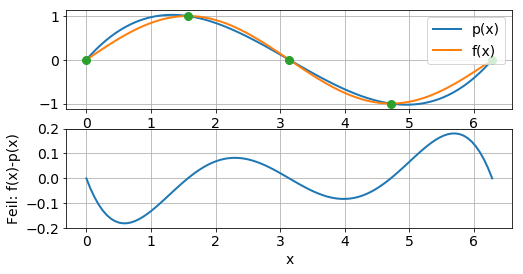

In [9]:
# Dette skriptet plotter
# * Funksjonen f og interpolasjonspolynomet p, samt interpolasjonspunktene.
# * Interpolasjonsfeilen f(x)-p(x)

# Definer funksjonen
def f(x):
    return sin(x)

n = 4                         # Antall interpolasjonspunkter 
a, b = 0, 2*pi                # Interpolasjonsintervallet
xdata = linspace(a, b, n+1)   # Noder: jevnt fordelte (kan endres)
ydata = f(xdata)              # y_i = f(x_i) i nodene

x = linspace(a, b, 101) 

l = kardinal(xdata, x)  
p = lagrange(ydata, l)

# Plotter f(x) og p(x)
subplot(2,1,1)
plot(x, p, x, f(x), xdata, ydata, 'o')
legend(['p(x)','f(x)'])

# Plotter interpolasjonsfeilen
subplot(2,1,2)
plot(x, f(x)-p)
xlabel('x')
ylabel('Feil: f(x)-p(x)')
print("Maks feil er {:.2e}".format(np.max(abs(p-f(x)))))

<a name="numexp_11"></a>
#### Numeriske eksperimenter 

1. Gjenta eksperimentet med økende antall interpolasjonspunkter,  f.eks. $n=8,16,32$?  Hvor stor er den maksimale feilen? Hvordan fordeler feilen seg over intervallet?
2. Gjenta eksperimentet over med Runges funksjon, 
   $$ f(x) = \frac{1}{1+x^2}, \qquad x\in [-5,5]. $$

La oss nå se om vi kan finne et uttrykk for avviket $e(x)=p_n(x)-f(x)$.

Anta at alle interpolasjonspunktene $x_i$ ligger i intervallet $[a,b]$. 
Anta dessuten at funksjonen $f(x)$ er tilstrekkelig deriverbar. 
Definer funksjonen 

$$ \omega(x) = \prod_{j=0}^{n}(x-x_i) = x^{n+1} + \dotsm. $$

Velg _en_ tilfeldig $x\in [a,b]$ forskjellig fra interpolasjonspunktene $x_i$, og for denne, for øyeblikket konstante, verdien av $x$ definer en funksjon av $t$:

$$ \varphi(t) = e(t)\omega(x) - e(x)\omega(t). $$

Der $e(t) = f(t)-p_n(t)$. 
Legg merke til at $\varphi(t)$ er like deriverbar mhp. $t$ som funksjonen $f(t)$, i tillegg 
har den $n+2$ distinkte nullpunkter, for $t=x_i$, $i=0,\dotsc,n$ og $t=x$. 
I følge Rolle's teorem/middelverdisetningen (Adams & Essex, Teorem 2.15) må da $\varphi'(t)$ ha minst et nullpunkt mellom hver av nullpunktene til $\varphi(t)$, det vil si totalt $n+1$ nullpunkter. Videre har $\varphi''(t)$  minst $n$ distinkte nullpunkter, og så videre. Til slutt, $\varphi^{(n+1)}(t)$ må ha minst et nullpunkt i intervallet $(a,b)$. Kall dette $\xi$. Siden $\omega^{(n+1)}(t)=(n+1)!$ og $e^{(n+1)}(t)=f^{(n+1)}(t)$  kan vi konkludere med at 

$$ \varphi(\xi)= 0 = f^{(n+1)}(\xi)\omega(x) - e(x)(n+1)!. $$ 

Denne kan løses mhp. feilen $e(x)$ for alle $x\in [a,b]$, men det ukjente nullpunktet $\xi$ avhenger av valget av $x$. Argumentet over er gyldig hvis $f$ er $n+1$ ganger kontinuerlig deriverbar på intervallet $[a,b]$. Vi har dermed vist følgende resultat:

##### Setning (interpolasjonsfeil)
<a name="intfeil"></a>
_Gitt $f \in C^{(n+1)}[a,b]$. La $p_{n} \in \mathbb{P}_n$ interpolere $f$ i $n+1$ distinkte interpolasjonspunkter $x_i \in [a,b]$. For hver $x\in [a,b]$ fins minst en $\xi(x) \in (a,b)$ slik at_

$$ f(x) - p_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!}\prod_{i=0}^n(x-x_i). $$


###### Jevnt fordelte interpolasjonspunkter

Dersom interpolasjonspunktene $x_i$ er jevnt fordelt over intervallet $[a,b]$, dvs. hvis $x_i=a+ih$, $h=(b-a)/n$, er det mulig å vise at 

$$ |\omega(x)| \leq \frac{h^{n+1}}{4}n! $$

slik at 

$$ |e(x)| \leq \frac{h^{n+1}}{4(n+1)}M, \qquad M=\max_{x\in[a,b]}|f^{(n+1)}(x)|. $$

for alle $x\in[a,b]$. 

##### Eksempel
La igjen $f(x)=\sin(x)$ og $p_n(x)$ polynomet som interpolerer $f(x)$
i $n+1$ jevnt fordelte noder over intervallet $[0, 2\pi]$. 

Finn en øvre grense for feilen $|e_n(x)|=|\sin(x)-p_n(x)|$ på dette intervallet.

_Svar:_ Med $f(x)=\sin(x)$ er $\max_{x\in[0,2\pi]}|f^{(n+1)}(x)|=1$ for alle $n$, så $M=1$.  
Dermed er 

$$
|e_n(x)| \leq \frac{1}{4(n+1)}\left(\frac{2\pi}{n}\right)^{n+1}
$$

La oss se hvor god denne grensen er i praksis. For økende verdier av $n$, regn ut interpolasjonspolynomet, mål $\max_x|e(x)|$ og sammenlign med feilskranken regnet ut over.

   n     Feil       Øvre skranke
   1   1.00e+00      4.93e+00
   3   2.55e-01      1.20e+00
   5   2.67e-02      1.64e-01
   7   1.69e-03      1.32e-02
   9   7.22e-05      6.88e-04


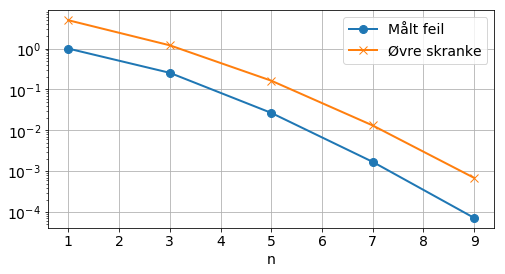

In [10]:
# Sammenligner feilen max|f(x)-p(x)| med feilskranken for et utvalg av n.

def feilskranke(n, M=1, a=0, b=1):
    # Feilskranke for n+1 jevnt fordelte noder. 
    h = (b-a)/n
    return 0.25*M*h**(n+1)/(n+1)

a, b = 0, 2*pi
M = 1
x = linspace(a, b, 101)
print('{:4s}  {:8s}  {:8s}'.format('   n', '   Feil', '    Øvre skranke'))
nn, nfeil, nskranke = [], [], []    # For å lage arrays av n, feil, feilskranke

for n in range(1, 10, 2):           # n = 1, 3, 5, 7, 9
    xdata = linspace(a, b, n+1)     # Jevnt fordelte noder
    ydata = f(xdata)
    l = kardinal(xdata, x)          # Regner ut interpolasjonspolynomet
    p = lagrange(ydata, l)
    feil = max(abs(p-f(x)))         # Regner ut maks avvik
    skranke = feilskranke(n, M, a, b)  # Finner feilskranken
    print('{:4d}   {:4.2e}      {:4.2e}'.format(n, feil, skranke))
    nn.append(n)                    # Lagrer n, feil og feilskranke
    nfeil.append(feil)
    nskranke.append(feilskranke(n, M, a, b))

# Plott feil og skranke som funksjon av n
# Bruker logaritmisk skala på y-aksen 
semilogy(nn, nfeil, '-o', nn, nskranke, '-x')
legend(['Målt feil', 'Øvre skranke'])
xlabel('n');

I dette eksempelet har vi konvergens, $p_n(x) \rightarrow \sin(x)$ når $n\rightarrow \infty$. Det er ikke alltid tilfelle, slik [eksperimentet med Runges funksjon](#numexp_11) over har demonstrert. 

## Optimalt valg av interpolasjonspunkter.
Så hva kan vi gjøre for å redusere feilen? 
Vi har egentlig bare en mulighet, se på hvordan nodene $x_i$ fordeles over intervallet, dvs. å gjøre $|\omega(x)|= \prod_{j=0}^{n}|x-x_i|$ så liten som mulig. La oss først gjøre studere fordelingen på et standardintervall $[-1,1]$, og deretter overføre resultatet til et tilfeldig intervall $[a,b]$. 

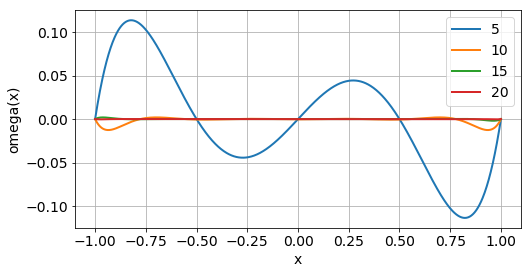

In [13]:
def omega(xdata, x):
    # Regner ut omega(x) for noder i xdata
    n1 = len(xdata)
    omega_value = ones(len(x))             
    for j in range(n1):
        omega_value = omega_value*(x-xdata[j])
    return omega_value
    

# Plott omega(x) for et sett med noder
a, b = -1, 1
x = linspace(a, b, 1001)        

antall_noder = [5, 10, 15, 20]    # Tilsvarer n+1 i formlene. 
for k in range(len(antall_noder)):
    n1 = antall_noder[k]
    xdata = linspace(a, b, n1)    # Jevnt fordelte noder
    plot(x, omega(xdata, x))
    
xlabel('x')
ylabel('omega(x)')
legend(antall_noder);

Kjør skriptet over. Legg merke til følgende:
* $\max_{x\in[-1,1]} |\omega(x)|$ blir mindre med økende antall noder. 
* $|\omega(x)|$ er størst nær endepunktene $[-1, 1]$. 

Det lønner seg antagelig å prøve å forskyve nodene mot endepunktene. 
Den optimale fordelingen av noder oppnås ved å bruke _Chebyshev-noder_,  gitt ved 

$$ \tilde{x}_i = \cos \left( \frac{(2i+1)\pi}{2(n+1)} \right), \qquad i=0,\cdots,n  $$

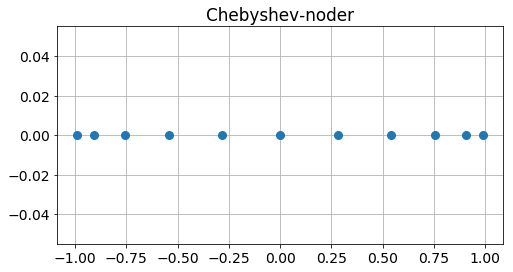

In [18]:
def cheb_noder(n):
    # returnerer n+1 Chebyshev-noder på intervallet [-1,1].
    i = array(range(n+1))    #  i = [0,1,2,3, ....n]
    return cos((2*i+1)*pi/(2*(n+1)))

n = 10
xc = cheb_noder(n)
plot(xc, zeros(n+1), 'o')
title('Chebyshev-noder');

Så tettheten av nodene er større langs de to endepunktene, akkurat som ønsket.
La $\omega_{Cheb}(x) = \prod_{j=1}^n(x-\tilde{x}_i)$. Det kan vises at

$$ \frac{1}{2^{n}} = \max_{x\in [-1, 1]} |\omega_{Cheb}(x)| \leq \max_{x \in [-1, 1]} |q(x)| $$

for alle polynomer $q \in \mathbb{P}_n$ på formen $q(x)=x^n + a_{n-1}x^{n-1} + \dotsc + a_1x + a_0$. 

Vi kan oppnå samme fordeling av noder på et tilfeldig intervall $[a,b]$ ved følgende lineære transformasjon

$$ x = \frac{b-a}{2}\tilde{x} + \frac{b+a}{2}$$

der $x\in[a,b]$ og $\tilde{x} \in [-1,1]$. Gjør vi dette vil vil 

$$
  \omega(x) = \prod_{j=0}^n (x-x_i) = 
  \left(\frac{b-a}{2}\right)^{n+1} \prod_{j=0}^n (\tilde{x}-\tilde{x}_i) 
  = \left(\frac{b-a}{2}\right)^{n+1} \omega_{Cheb}(\tilde{x}). 
$$

Ved å samle alt dette, og bruke det sammen med [setningen om interpolasjonsfeil](intfeil) får vi:

##### Setning (interpolasjonsfeil for Chebyshev-noder)
_Gitt $f \in C^{(n+1)}[a,b]$, og la $M_{n+1} = \max_{x\in [a,b]}|f^{(n+1)}(x)|$.  La $p_{n} \in \mathbb{P}_n$ interpolere $f$ i $n+1$ Chebyshev-noder $x_i \in [a,b]$. Da gjelder_

$$ \max_{x\in[a,b]}|f(x) - p_n(x)| \leq \frac{(b-a)^{n+1}}{2^{2n+1}(n+1)!} M_{n+1}. $$

**NB** Chebyshev-noder er det beste som kan velges generelt. Men for en enkelte funksjoner $f$ kan det være andre fordelinger som gir bedre resultat. 

#### Numeriske eksperimenter
1. Plott $\omega_{Cheb}(x)$ for $n=2, 4, 8, 16$. 
2. Gjenta de [numeriske eksperimentene](#numexp_11) gitt ovenfor, men bruk 
   Chebyshev-noder i stedet for jevnt fordelte noder. Sammenlign resultatene. 

_Til informasjon_: 
[Chebfun](http://www.chebfun.org/) er en programpakke som gjør det mulig å regne med funksjoner med en nøyaktighet nær maskinnøyaktigheten. Den er basert på polynominterpolasjon i Chebyshev noder. 

## References
[1] _Calculus: A complete course_.  Lærebok Matematikk 1 og 2.    
[2] _Differential equations, linear algebra and its applications_. Lærebok Matematikk 3. 